Python 里面有一个 [wordcloud](https://github.com/amueller/word_cloud) 的第三方库，可以对标签云可视化

这个例子中我们对一篇公众号[文章](https://mp.weixin.qq.com/s/JtwM8jaFuLjYQ5R12816yg)做标签云可视化

1. 先抓取文章的内容
2. 分词
3. 统计词频
4. 对词频可视化

In [1]:
# !pip install jieba pyquery wordcloud

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import jieba
import pandas as pd
from pyquery import PyQuery as pq
import wordcloud

In [3]:
body = pq('https://mp.weixin.qq.com/s/JtwM8jaFuLjYQ5R12816yg')('#js_content')[0].text_content()
words = list(filter(lambda x: len(x.strip())>1, jieba.cut(body)))
frequencies = pd.Series(list(words), name='word').value_counts().to_dict()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.601 seconds.
Prefix dict has been built successfully.


In [4]:
wc = wordcloud.WordCloud(font_path='/data/font/PingFang-SC-Regular.ttf')

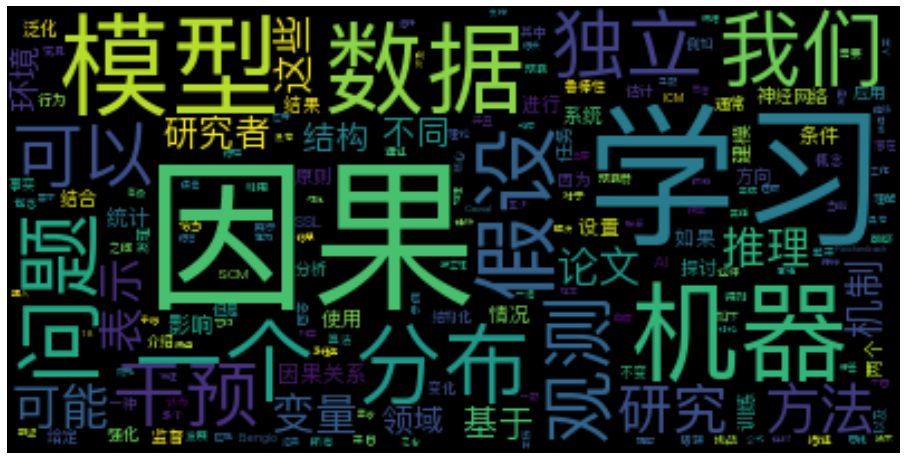

In [5]:
wc.fit_words(frequencies)
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()